In [1]:
# import mesa_reader to make its classes accessible
import mesa_reader as mr
from astropy import constants as const
from astropy.constants import M_sun
import math
import mmap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib as mpl

In [2]:
dataDir = '/media/sf_hellmersjl/bitbucket/hellmers_ms_data'
rootDir = '/media/sf_hellmersjl/bitbucket/hellmers_ms'
imagesDir = '/media/sf_hellmersjl/bitbucket/hellmers_ms/thesis_doc/Figures'
solarR = const.R_sun.to('km').value

In [3]:
def lastModel(modelName):
    
    import mesa_reader as mr 
    
    profileFile = dataDir + '/' + modelName + '/LOGS/profiles.index'
    modelProfileIndex = mr.MesaProfileIndex(profileFile)
    maxProfileIndex = modelProfileIndex.index_data['profile_numbers'].size
    profileFile = dataDir + '/' + modelName + '/LOGS/profile' + str(maxProfileIndex) + '.data'
    
    return mr.MesaData(profileFile)

In [4]:
def thirdModel(modelName):
    
    import mesa_reader as mr 
    
    profileFile = dataDir + '/' + modelName + '/LOGS/profile' + str(3) + '.data'
    
    return mr.MesaData(profileFile)


In [5]:
def finalRadius(model):
    
    numZones = model.header_data['num_zones']
    
    return solarR * 10.0**(model.data('logR')[0])
    

In [6]:
def finalLuminosity(model):
    
    from astropy import constants as const
    from astropy.constants import L_sun    
    
    numZones = model.header_data['num_zones']
    
    return model.data('luminosity')[numZones-1]


In [7]:
def finalC12C12(model):
    
    from astropy import constants as const
    from astropy.constants import L_sun    
    
    numZones = model.header_data['num_zones']
    
    return model.data('c12_c12')[numZones-1]


In [8]:
def finalCentralLogT(model):
        
    numZones = model.header_data['num_zones']
    
    return model.data('logT')[numZones-1]


In [9]:
def finalCentralLogRho(model):
        
    numZones = model.header_data['num_zones']
    
    return model.data('logRho')[numZones-1]

In [10]:
def finalTeff(model):
        
    return model.header_data['Teff']

In [11]:
def getRateInfo(x):
            
    if ("nopycno" in x):
        rateType = "No Pycno"
        nnType = "-"
        latType = "-"
        latApprox = "-"
    else:
        if ("noc12pycno" in x):
            rateType = "G05"
            nnType = "Sao Paulo"
            latType = "bcc"
            latApprox = "Relaxed"
        else:
            if ("g05" in x):
                rateType = "G05"
                nnType = "Sao Paulo"
                latType = "TBD"
                latApprox = "TBD"
            else:
                if ("spvh" in x):
                    rateType = "SPVH"
                else:
                    rateType = "SK"
                if ("m3y" in x):
                    nnType = "M3Y"
                else:
                    if ("rmf" in x):
                        nnType = "RMF"
                    else:
                        nnType = "Sao Paulo"
                if ("bcc" in x or "spvh" in x):
                    latType = "bcc"
                else:
                    latType = "fcc"
                if ("ws" in x):
                    latApprox = "WS"
                else:
                    if ("relaxed" in x):
                        latApprox = "Relaxed"
                    else:
                        latApprox = "Static"
                    
    return rateType, nnType, latType, latApprox

In [12]:
g05final = lastModel('wd_ignite_g05')
m3y_spvhfinal = lastModel('wd_ignite_m3y_spvh')
m3y_bcc_relaxedfinal = lastModel('wd_ignite_m3y_bcc_relaxed')
m3y_bcc_relaxedfinal_adj = lastModel('wd_ignite_m3y_bcc_relaxed_adj')
m3y_bcc_staticfinal = lastModel('wd_ignite_m3y_bcc_static')
m3y_bcc_wsfinal = lastModel('wd_ignite_m3y_bcc_ws')
m3y_fcc_relaxedfinal = lastModel('wd_ignite_m3y_fcc_relaxed')
m3y_fcc_staticfinal = lastModel('wd_ignite_m3y_fcc_static')
m3y_fcc_wsfinal = lastModel('wd_ignite_m3y_fcc_ws')
sp_spvhfinal = lastModel('wd_ignite_sp_spvh')
sp_bcc_relaxedfinal = lastModel('wd_ignite_sp_bcc_relaxed')
sp_bcc_staticfinal = lastModel('wd_ignite_sp_bcc_static')
sp_bcc_wsfinal = lastModel('wd_ignite_sp_bcc_ws')
sp_fcc_relaxedfinal = lastModel('wd_ignite_sp_fcc_relaxed')
sp_fcc_staticfinal = lastModel('wd_ignite_sp_fcc_static')
sp_fcc_wsfinal = lastModel('wd_ignite_sp_fcc_ws')
noPycnofinal = lastModel('wd_ignite_nopycno')
rmf_spvhfinal = lastModel('wd_ignite_rmf_spvh')
rmf_bcc_relaxedfinal = lastModel('wd_ignite_rmf_bcc_relaxed')
rmf_bcc_staticfinal = lastModel('wd_ignite_rmf_bcc_static')
rmf_bcc_wsfinal = lastModel('wd_ignite_rmf_bcc_ws')
rmf_fcc_relaxedfinal = lastModel('wd_ignite_rmf_fcc_relaxed')
rmf_fcc_staticfinal = lastModel('wd_ignite_rmf_fcc_static')
rmf_fcc_wsfinal = lastModel('wd_ignite_rmf_fcc_ws')

In [13]:
#help(g05final)
#print(g05final.header_names)
#print(g05final.header_data)
print(g05final.bulk_names)

('zone', 'logT', 'logRho', 'logP', 'logR', 'luminosity', 'eps_grav', 'signed_log_eps_grav', 'net_energy', 'signed_log_power', 'velocity', 'entropy', 'conv_mixing_type', 'csound', 'v_div_csound', 'eta', 'mu', 'logdq', 'dq_ratio', 'q', 'radius', 'temperature', 'tau', 'logtau', 'pressure', 'pgas_div_ptotal', 'logPgas', 'grada', 'gam', 'free_e', 'abar', 'ye', 'log_opacity', 'eps_nuc', 'non_nuc_neu', 'mlt_mixing_length', 'mlt_mixing_type', 'gradT_sub_grada', 'log_D_mix', 'log_conv_vel', 'conv_vel_div_csound', 'log_mlt_D_mix', 'pressure_scale_height', 'gradT', 'gradr', 'dlnd_dt', 'dlnT_dt', 'signed_dlnd', 'signed_dlnT', 'mass', 'mmid', 'logxq', 'logxm', 'diff_grads', 'log_diff_grads', 'eps_mdot', 'ergs_mdot', 'ergs_error', 'frac_eosPC', 'eps_grav_plus_eps_mdot', 'ergs_eps_grav_plus_eps_mdot', 'cell_internal_energy_fraction', 'neut', 'h1', 'prot', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'cr56', 'fe52', 'fe54', 'fe56', 'ni56', 'pp', 'cn

In [14]:
f = open(rootDir + '/modelslist.txt', "r")
stopCondition = {'wd_ignite': 'unstable'}
rateWarning = {'wd_ignite': False}
finalR = {'wd_ignite': finalRadius(lastModel('wd_ignite'))}
finalLogTc = {"wd_ignite": finalCentralLogT(lastModel('wd_ignite'))}
Teff = {"wd_ignite": finalTeff(lastModel('wd_ignite'))}
starAge = {"wd_ignite":None}
starMass = {"wd_ignite":None}
totNucBurn = {"wd_ignite":None}
c12c12 = {"wd_ignite":None}
for x in f:
    modelname = x.strip()
    stopCondition[modelname] = None
    print("Model: " + modelname)
    searchFile = dataDir + '/logs/' + modelname + '.out'
    with open(searchFile,'rb',0) as file, mmap.mmap(file.fileno(), 0, access=mmap.ACCESS_READ) as s:
        if s.find(b'stop because power_nuc_burn >= power_nuc_burn_upper_limit') != -1:
            stopCondition[modelname] = 'unstable'
        if s.find(b'stop because model_number >= max_model_number') != -1:
            stopCondition[modelname] = 'stable'
        if s.find(b'rates have been truncated') != -1:
            rateWarning[modelname] = True
        else:
            rateWarning[modelname] = False
    thisModel = lastModel(modelname)
    finalR[modelname] = finalRadius(thisModel)        
    finalLogTc[modelname] = finalCentralLogT(thisModel)
    starAge[modelname] = thisModel.star_age
    starMass[modelname] = thisModel.star_mass
    totNucBurn[modelname] = thisModel.power_nuc_burn
    c12c12[modelname] = finalC12C12(thisModel)
    Teff[modelname] = finalTeff(thisModel)



Model: wd_ignite
Model: wd_ignite_nopycno
Model: wd_ignite_noc12pycno
Model: wd_ignite_g05
Model: wd_ignite_m3y_spvh
Model: wd_ignite_m3y_bcc_relaxed
Model: wd_ignite_m3y_bcc_relaxed_adj
Model: wd_ignite_m3y_bcc_static
Model: wd_ignite_m3y_bcc_ws
Model: wd_ignite_m3y_fcc_relaxed
Model: wd_ignite_m3y_fcc_static
Model: wd_ignite_m3y_fcc_ws
Model: wd_ignite_sp_spvh
Model: wd_ignite_sp_bcc_relaxed
Model: wd_ignite_sp_bcc_static
Model: wd_ignite_sp_bcc_ws
Model: wd_ignite_sp_fcc_relaxed
Model: wd_ignite_sp_fcc_static
Model: wd_ignite_sp_fcc_ws
Model: wd_ignite_rmf_spvh
Model: wd_ignite_rmf_bcc_relaxed
Model: wd_ignite_rmf_bcc_static
Model: wd_ignite_rmf_bcc_ws
Model: wd_ignite_rmf_fcc_relaxed
Model: wd_ignite_rmf_fcc_static
Model: wd_ignite_rmf_fcc_ws


In [15]:
finalradii = np.zeros(len(stopCondition)-4)
finalteff= np.zeros(len(stopCondition)-4)

i = 0
for x in stopCondition:
    if ((stopCondition[x] == 'unstable') and (x != 'wd_ignite') and (x != 'wd_ignite_m3y_bcc_relaxed_adj') and 
        (x != 'wd_ignite_noc12pycno')):
        if (x!='wd_ignite_nopycno'):
            finalradii[i] = finalR[x]
            finalteff[i] = Teff[x]
            i = i + 1
        rateType, nnType, latType, latApprox = getRateInfo(x)
        print("%s & %s & %s & %s & %.0f & %.f & %.1f \\\\ \hline" %(rateType, nnType, latType, latApprox, finalR[x],Teff[x],starAge[x]/10**6))
        
print(finalradii)

No Pycno & - & - & - & 1505 & 96153 & 389.1 \\ \hline
G05 & Sao Paulo & TBD & TBD & 1340 & 106612 & 394.2 \\ \hline
SPVH & M3Y & bcc & Static & 1339 & 106627 & 394.3 \\ \hline
SK & M3Y & bcc & Relaxed & 1351 & 105836 & 393.9 \\ \hline
SK & M3Y & bcc & Static & 1339 & 106717 & 394.3 \\ \hline
SK & M3Y & bcc & WS & 1352 & 105910 & 393.9 \\ \hline
SK & M3Y & fcc & Relaxed & 1347 & 106225 & 394.0 \\ \hline
SK & M3Y & fcc & Static & 1337 & 106859 & 394.3 \\ \hline
SK & M3Y & fcc & WS & 1347 & 106138 & 394.0 \\ \hline
SPVH & Sao Paulo & bcc & Static & 1338 & 106759 & 394.3 \\ \hline
SK & Sao Paulo & bcc & Relaxed & 1349 & 106016 & 394.0 \\ \hline
SK & Sao Paulo & bcc & Static & 1337 & 106849 & 394.3 \\ \hline
SK & Sao Paulo & bcc & WS & 1349 & 106086 & 393.9 \\ \hline
SK & Sao Paulo & fcc & Relaxed & 1347 & 106223 & 394.0 \\ \hline
SK & Sao Paulo & fcc & Static & 1338 & 106748 & 394.3 \\ \hline
SK & Sao Paulo & fcc & WS & 1344 & 106386 & 394.1 \\ \hline
SPVH & RMF & bcc & Static & 1339 & 106

In [16]:
#finalradii = np.zeros(len(stopCondition)-2)
#finalteff= np.zeros(len(stopCondition)-2)

model1 = 'wd_ignite_m3y_bcc_relaxed'
model2 = 'wd_ignite_m3y_bcc_relaxed_adj'

print("%s & %.1f & %.1f \\\\ \hline" %("R (km)",finalR[model1],finalR[model2]))
print("%s & %.1f & %.1f \\\\ \hline" %("Teff (K)",Teff[model1],Teff[model2]))
print("%s & %.2f & %.2f \\\\ \hline" %("Log Tot Nuc (ergs)",np.log10(totNucBurn[model1]),np.log10(totNucBurn[model2])))
print("%s & %.3f & %.3f \\\\ \hline" %("Mass (Solar Mass)",starMass[model1],starMass[model2]))
print("%s & %.3f & %.3f \\\\ \hline" %("Age (Myr)",starAge[model1]/1000000,starAge[model2]/1000000))
print("%s & %.3f & %.3f \\\\ \hline" %("Log Tc (K)",finalLogTc[model1],finalLogTc[model2]))
print("%s & %.3f & %.3f \\\\ \hline" %("Log Carbon Rxn (sec^-1 * cm^-3)",np.log10(c12c12[model1]),np.log10(c12c12[model2])))

R (km) & 1351.2 & 1352.4 \\ \hline
Teff (K) & 105836.1 & 106711.4 \\ \hline
Log Tot Nuc (ergs) & 8.16 & 7.46 \\ \hline
Mass (Solar Mass) & 1.394 & 1.393 \\ \hline
Age (Myr) & 393.912 & 393.301 \\ \hline
Log Tc (K) & 8.538 & 8.502 \\ \hline
Log Carbon Rxn (sec^-1 * cm^-3) & 10.004 & 9.306 \\ \hline


In [17]:
#finalradii = np.zeros(len(stopCondition)-2)
#finalteff= np.zeros(len(stopCondition)-2)

model1 = 'wd_ignite_nopycno'
model2 = 'wd_ignite_noc12pycno'

print("%s & %.1f & %.1f \\\\ \hline" %("R (km)",finalR[model1],finalR[model2]))
print("%s & %.1f & %.1f \\\\ \hline" %("Teff (K)",Teff[model1],Teff[model2]))
print("%s & %.2f & %.2f \\\\ \hline" %("Log Tot Nuc (ergs)",np.log10(totNucBurn[model1]),np.log10(totNucBurn[model2])))
print("%s & %.3f & %.3f \\\\ \hline" %("Mass (Solar Mass)",starMass[model1],starMass[model2]))
print("%s & %.3f & %.3f \\\\ \hline" %("Age (Myr)",starAge[model1]/1000000,starAge[model2]/1000000))
print("%s & %.3f & %.3f \\\\ \hline" %("Log Tc (K)",finalLogTc[model1],finalLogTc[model2]))
print("%s & %.3f & %.3f \\\\ \hline" %("Log Carbon Rxn (sec^-1 * cm^-3)",np.log10(c12c12[model1]),np.log10(c12c12[model2])))

R (km) & 1504.9 & 1338.6 \\ \hline
Teff (K) & 96153.2 & 106615.1 \\ \hline
Log Tot Nuc (ergs) & 8.15 & 8.10 \\ \hline
Mass (Solar Mass) & 1.389 & 1.394 \\ \hline
Age (Myr) & 389.059 & 394.302 \\ \hline
Log Tc (K) & 8.616 & 8.529 \\ \hline
Log Carbon Rxn (sec^-1 * cm^-3) & 10.014 & 9.944 \\ \hline


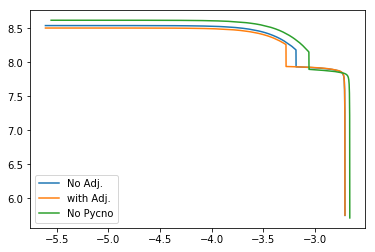

In [18]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('logT'),label='No Adj.')
plt.plot(m3y_bcc_relaxedfinal_adj.data('logR'),m3y_bcc_relaxedfinal_adj.data('logT'),label='with Adj.')
plt.plot(noPycnofinal.data('logR'),noPycnofinal.data('logT'),label='No Pycno')
plt.legend()


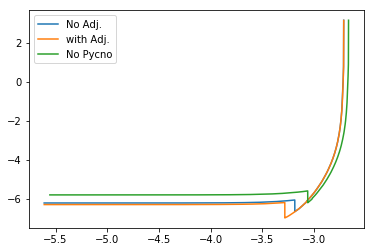

In [19]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('log_opacity'),label='No Adj.')
plt.plot(m3y_bcc_relaxedfinal_adj.data('logR'),m3y_bcc_relaxedfinal_adj.data('log_opacity'),label='with Adj.')
plt.plot(noPycnofinal.data('logR'),noPycnofinal.data('log_opacity'),label='No Pycno')
plt.legend()

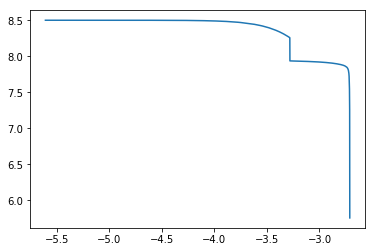

In [20]:
plt.plot(m3y_bcc_relaxedfinal_adj.data('logR'),m3y_bcc_relaxedfinal_adj.data('logT'))

In [21]:
print(stopCondition)
meanFinalRadii = np.mean(finalradii)
print(meanFinalRadii)
errorsFinalRadii = ((finalradii - meanFinalRadii)/meanFinalRadii)*100
print(errorsFinalRadii)
i = 0
for x in stopCondition:
    if ((stopCondition[x] == 'unstable') and (x != 'wd_ignite') and (x != 'wd_ignite_noc12pycno')):
        rateType, nnType, latType, latApprox = getRateInfo(x)
        if (x == 'wd_ignite_nopycno'):
            print("%s & %s & %s & %s & %.0f & %s \\\\ \hline" %(rateType,nnType,latType, latApprox, finalR[x],"-"))
        else:
            print("%s & %s & %s & %s & %.0f & %.2f \\\\ \hline" %(rateType,nnType,latType, latApprox, finalR[x],errorsFinalRadii[i]))
            i = i + 1


{'wd_ignite': 'unstable', 'wd_ignite_nopycno': 'unstable', 'wd_ignite_noc12pycno': 'unstable', 'wd_ignite_g05': 'unstable', 'wd_ignite_m3y_spvh': 'unstable', 'wd_ignite_m3y_bcc_relaxed': 'unstable', 'wd_ignite_m3y_bcc_relaxed_adj': None, 'wd_ignite_m3y_bcc_static': 'unstable', 'wd_ignite_m3y_bcc_ws': 'unstable', 'wd_ignite_m3y_fcc_relaxed': 'unstable', 'wd_ignite_m3y_fcc_static': 'unstable', 'wd_ignite_m3y_fcc_ws': 'unstable', 'wd_ignite_sp_spvh': 'unstable', 'wd_ignite_sp_bcc_relaxed': 'unstable', 'wd_ignite_sp_bcc_static': 'unstable', 'wd_ignite_sp_bcc_ws': 'unstable', 'wd_ignite_sp_fcc_relaxed': 'unstable', 'wd_ignite_sp_fcc_static': 'unstable', 'wd_ignite_sp_fcc_ws': 'unstable', 'wd_ignite_rmf_spvh': 'unstable', 'wd_ignite_rmf_bcc_relaxed': 'unstable', 'wd_ignite_rmf_bcc_static': 'unstable', 'wd_ignite_rmf_bcc_ws': 'unstable', 'wd_ignite_rmf_fcc_relaxed': 'unstable', 'wd_ignite_rmf_fcc_static': 'unstable', 'wd_ignite_rmf_fcc_ws': 'unstable'}
1344.283515204761
[-0.35508633 -0.422389

In [22]:
meanFinalTeff = np.mean(finalteff)
print(meanFinalTeff)
print(finalteff)
errorsFinalTeff = ((finalteff - meanFinalTeff)/meanFinalTeff)*100
print(errorsFinalTeff)
i = 0
for x in stopCondition:
    if ((stopCondition[x] == 'unstable') and (x != 'wd_ignite') and (x != 'wd_ignite_noc12pycno')):
        rateType, nnType, latType, latApprox = getRateInfo(x)
        if (x == 'wd_ignite_nopycno'):
            print("%s & %s & %s & %s & %.0f & %s \\\\ \hline" %(rateType,nnType,latType, latApprox, Teff[x],"-"))
        else:
            print("%s & %s & %s & %s & %.0f & %.2f \\\\ \hline" %(rateType,nnType,latType, latApprox, finalteff[i],errorsFinalTeff[i]))
            i = i + 1

106359.73190143565
[106611.54465165 106627.42612287 105836.12742328 106716.7760641
 105910.16544153 106224.77519105 106858.53740153 106137.66589004
 106758.58426624 106015.51878003 106849.36277257 106085.9160557
 106222.64088334 106748.16055039 106386.03465407 106691.65973995
 105839.47059151 106926.40739405 105880.14688518 105912.89548934
 106748.96751318 105925.31806998]
[ 0.23675572  0.25168757 -0.49229579  0.33569487 -0.42268484 -0.12688704
  0.46897965 -0.20878768  0.37500317 -0.32363105  0.46035362 -0.25744315
 -0.12889372  0.36520273  0.02472999  0.31208036 -0.48915252  0.53279139
 -0.45090845 -0.42011803  0.36596144 -0.40843825]
No Pycno & - & - & - & 96153 & - \\ \hline
G05 & Sao Paulo & TBD & TBD & 106612 & 0.24 \\ \hline
SPVH & M3Y & bcc & Static & 106627 & 0.25 \\ \hline
SK & M3Y & bcc & Relaxed & 105836 & -0.49 \\ \hline
SK & M3Y & bcc & Static & 106717 & 0.34 \\ \hline
SK & M3Y & bcc & WS & 105910 & -0.42 \\ \hline
SK & M3Y & fcc & Relaxed & 106225 & -0.13 \\ \hline
SK & 

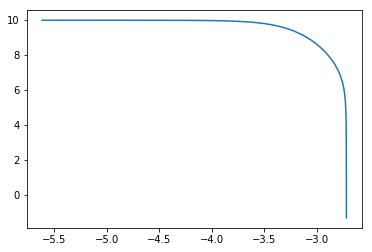

In [23]:

maxR = np.power(g05final.data('logR'),10.0)
plt.plot(g05final.data('logR'),g05final.data('logRho'))

1.1034420969481916e+100
393912256.12296337


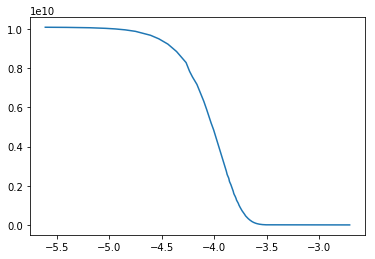

In [24]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('c12_c12'))
print(max(m3y_bcc_relaxedfinal.data('c12_c12')**10))
print(m3y_bcc_relaxedfinal.star_age)

248068971976.96188
394269972.18568283


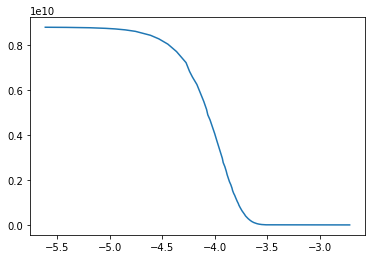

In [25]:
plt.plot(m3y_bcc_staticfinal.data('logR'),m3y_bcc_staticfinal.data('c12_c12'))
print(sum(m3y_bcc_staticfinal.data('c12_c12')))
print(m3y_bcc_staticfinal.star_age)

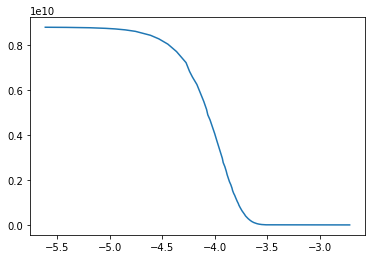

In [26]:
plt.plot(m3y_bcc_staticfinal.data('logR'),m3y_bcc_staticfinal.data('c12_c12'))

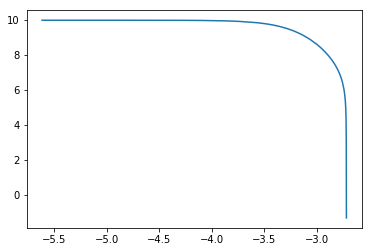

In [27]:
plt.plot(m3y_bcc_staticfinal.data('logR'),m3y_bcc_staticfinal.data('logRho'))


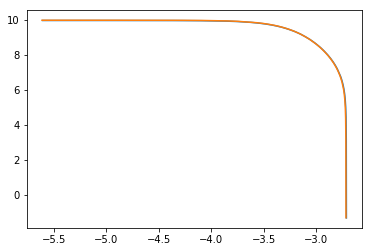

In [28]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('logRho'))
plt.plot(m3y_bcc_staticfinal.data('logR'),m3y_bcc_staticfinal.data('logRho'))

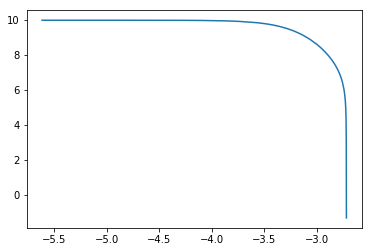

In [29]:
plt.plot(m3y_bcc_staticfinal.data('logR'),m3y_bcc_staticfinal.data('logRho'))

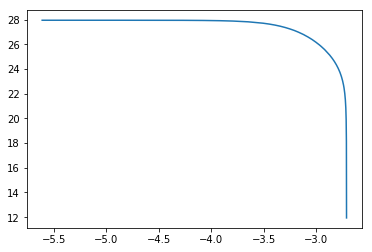

In [30]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('logP'))

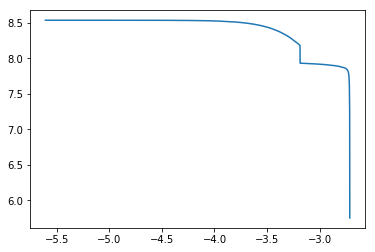

In [31]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('logT'))

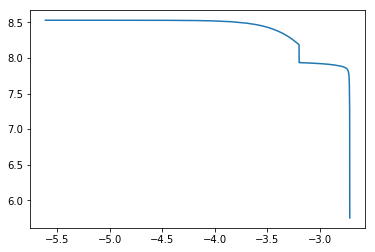

In [32]:
plt.plot(m3y_bcc_staticfinal.data('logR'),m3y_bcc_staticfinal.data('logT'))

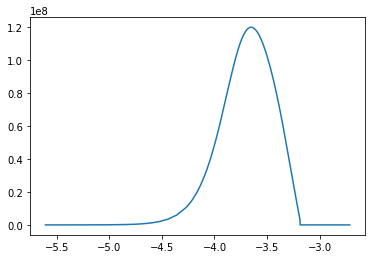

In [33]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('luminosity'))

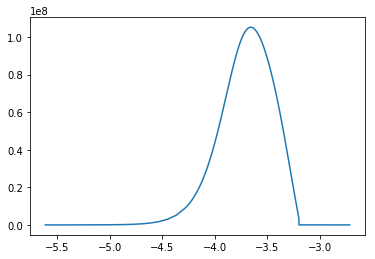

In [34]:
plt.plot(m3y_bcc_staticfinal.data('logR'),m3y_bcc_staticfinal.data('luminosity'))

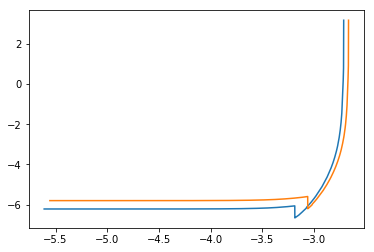

In [35]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('log_opacity'))
plt.plot(noPycnofinal.data('logR'),noPycnofinal.data('log_opacity'))


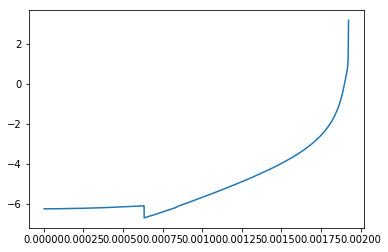

In [36]:
plt.plot(10**(m3y_bcc_staticfinal.data('logR')),m3y_bcc_staticfinal.data('log_opacity'))

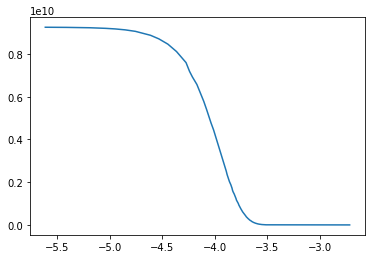

In [37]:
plt.plot(m3y_spvhfinal.data('logR'),m3y_spvhfinal.data('c12_c12'))

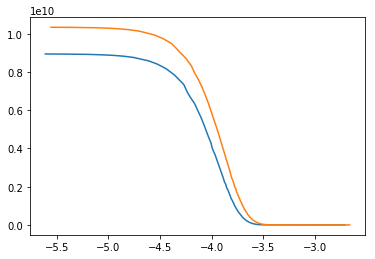

In [38]:
# NOTE: This just happens to work because 
plt.plot(rmf_fcc_relaxedfinal.data('logR'),rmf_fcc_relaxedfinal.data('c12_c12'))
plt.plot(noPycnofinal.data('logR'),noPycnofinal.data('c12_c12'))

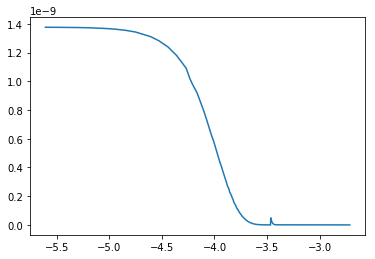

In [39]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('tri_alfa'))

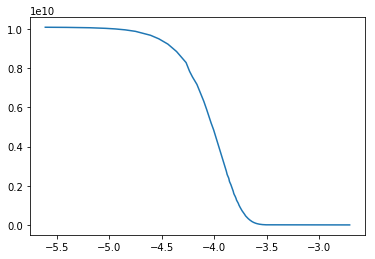

In [40]:
plt.plot(m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('c12_c12'))

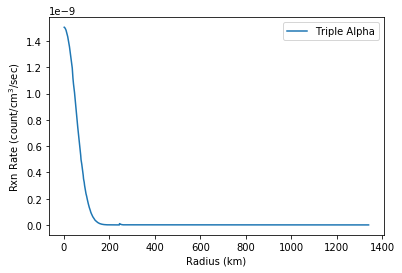

In [41]:
plt.plot(solarR*10**g05final.data('logR'),g05final.data('tri_alfa'),label='Triple Alpha')#
#plt.title("G05 Rxn Rates - Triple Alpha")
plt.legend()
plt.xlabel("Radius (km)")
plt.ylabel("Rxn Rate (count/$\\rm cm^3$/sec)")
plt.savefig(imagesDir+'/g05finalTripleAlpha.eps')

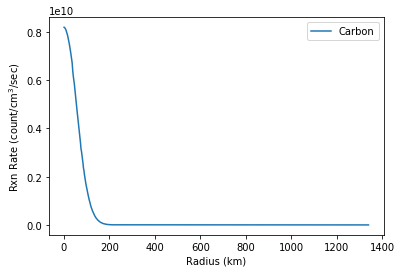

In [42]:
plt.plot(solarR*10**g05final.data('logR'),g05final.data('c12_c12'),label='Carbon')
#plt.title("G05 Rxn Rates - C12")
plt.legend()
plt.xlabel("Radius (km)")
plt.ylabel("Rxn Rate (count/$\\rm cm^3/sec$)")
plt.savefig(imagesDir+'/g05finalC12.eps')

In [43]:
def printFinalAbundance(thismodel,pTitle,pFileName):

    fe56abundance = thismodel.data('fe56')
    ne20abundance = thismodel.data('ne20')
    mg24abundance = thismodel.data('mg24')

    threshold =  0.000000001

    threshold_indices = fe56abundance <  threshold
    fe56abundance[threshold_indices] =  threshold

    threshold_indices = ne20abundance <  threshold
    ne20abundance[threshold_indices] =  threshold

    threshold_indices = mg24abundance <  threshold
    mg24abundance[threshold_indices] =  threshold

    rvalues = solarR*10.0**thismodel.data('logR')

    plt.plot(rvalues,np.log10(thismodel.data('o16')),label="O16",linestyle='dotted')
    plt.plot(rvalues,np.log10(thismodel.data('c12')),label="C12",linestyle='solid')
    plt.plot(rvalues,np.log10(ne20abundance),label="Ne20",linestyle='dashdot')
    plt.plot(rvalues,np.log10(mg24abundance),label="Mg24",linestyle='dashed')
    
    #plt.title(pTitle)
    plt.xlabel("Radius (km)")
    plt.ylabel("Log % Abundance")
    plt.legend()
    plt.savefig(imagesDir+'/'+ pFileName)

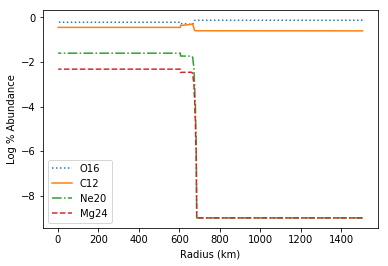

In [44]:
printFinalAbundance(noPycnofinal,'Abundances - No Pycno','abundNopycno.eps')

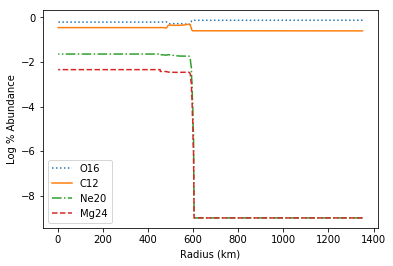

In [45]:
printFinalAbundance(m3y_bcc_relaxedfinal,'Abundances - M3Y bcc Relaxed','abundM3Ybccrelaxed.eps')

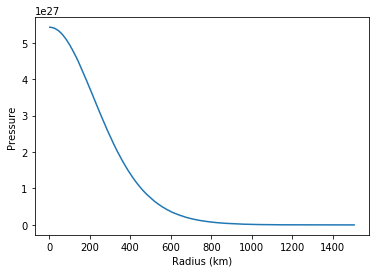

In [46]:
plt.plot(solarR*10**noPycnofinal.data('logR'),10**noPycnofinal.data('logP'))
#plt.title("No Pycno Pressure")
plt.xlabel("Radius (km)")
plt.ylabel("Pressure")
plt.savefig(imagesDir+'/noPycnofinalPressure.eps')

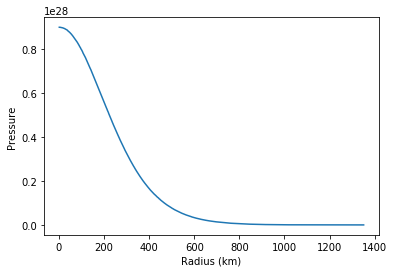

In [47]:
plt.plot(solarR*10**m3y_bcc_relaxedfinal.data('logR'),10**m3y_bcc_relaxedfinal.data('logP'))
#plt.title("M3Y bcc Relaxed Pressure")
plt.xlabel("Radius (km)")
plt.ylabel("Pressure")
plt.savefig(imagesDir+'/finalM3YbccRelaxedPressure.eps')

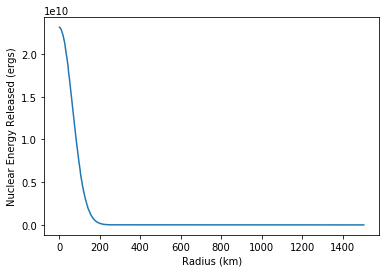

In [48]:
plt.plot(solarR*10**noPycnofinal.data('logR'),noPycnofinal.data('eps_nuc'))
#plt.title("No Pycno Nuclear Energy vs. Radius")
plt.xlabel("Radius (km)")
plt.ylabel("Nuclear Energy Released (ergs)")
plt.savefig(imagesDir+'/noPycnofinaleps_nuc.eps')

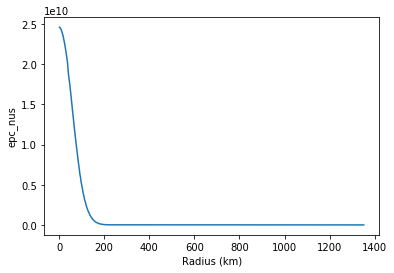

In [49]:
plt.plot(solarR*10**m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('eps_nuc'))
#plt.title("Pycno eps nuc")
plt.xlabel("Radius (km)")
plt.ylabel("epc_nus")
plt.savefig(imagesDir+'/M3YbccRelaxedeps_nuc.eps')

In [50]:
print(max(noPycnofinal.data('gam')))
noPycnofinal.star_age

54.44861160545099


389059234.72655296

In [51]:
massNoPycno = noPycnofinal.star_mass
massPycno = m3y_bcc_relaxedfinal.star_mass
print(noPycnofinal.star_mass_h1/massNoPycno,m3y_bcc_relaxedfinal.star_mass_h1/massPycno)
print(noPycnofinal.star_mass_he3/massNoPycno,m3y_bcc_relaxedfinal.star_mass_he3/massPycno) 
print(noPycnofinal.star_mass_he4/massNoPycno,m3y_bcc_relaxedfinal.star_mass_he4/massPycno)
print(noPycnofinal.star_mass_c12/massNoPycno,m3y_bcc_relaxedfinal.star_mass_c12/massPycno)
print(noPycnofinal.star_mass_n14/massNoPycno,m3y_bcc_relaxedfinal.star_mass_n14/massPycno)                           
print(noPycnofinal.star_mass_o16/massNoPycno,m3y_bcc_relaxedfinal.star_mass_o16/massPycno)                          
print(noPycnofinal.star_mass_ne20/massNoPycno,m3y_bcc_relaxedfinal.star_mass_ne20/massPycno)
print(noPycnofinal.star_mass,m3y_bcc_relaxedfinal.star_mass)

print("%s & %5.4f & %5.4f \\\\ \hline" %("O16",noPycnofinal.star_mass_o16/massNoPycno,m3y_bcc_relaxedfinal.star_mass_o16/massPycno))
print("%s & %5.4f & %5.4f \\\\ \hline" %("C16",noPycnofinal.star_mass_c12/massNoPycno,m3y_bcc_relaxedfinal.star_mass_c12/massPycno))
print("%s & %5.4f & %5.4f \\\\ \hline" %("Ne20",noPycnofinal.star_mass_ne20/massNoPycno,m3y_bcc_relaxedfinal.star_mass_ne20/massPycno))

2.357398482052549e-47 2.548706155842507e-48
1.0192974513437665e-26 3.413022825007739e-27
8.757192584280301e-14 2.2114290454373099e-13
0.3368884379607034 0.3382964681705353
4.0930561088766013e-19 5.757436585807277e-19
0.640634060285146 0.6412475790746303
0.01743964541135188 0.01570600240619405
1.3890592347265525 1.3939122561229638
O16 & 0.6406 & 0.6412 \\ \hline
C16 & 0.3369 & 0.3383 \\ \hline
Ne20 & 0.0174 & 0.0157 \\ \hline


In [52]:
print("%s & %5.2f & %5.2f \\\\ \hline" %('pp',np.log10(sum(noPycnofinal.data('pp'))),np.log10(sum(m3y_bcc_relaxedfinal.data('pp')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('CNO',np.log10(sum(noPycnofinal.data('cno'))),np.log10(sum(m3y_bcc_relaxedfinal.data('cno')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('Triple Alpha',np.log10(sum(noPycnofinal.data('tri_alfa'))),np.log10(sum(m3y_bcc_relaxedfinal.data('tri_alfa')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('N',np.log10(sum(noPycnofinal.data('burn_n'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_n')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('Ne',np.log10(sum(noPycnofinal.data('burn_ne'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_ne')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('Mg',np.log10(sum(noPycnofinal.data('burn_mg'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_mg')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('Si',np.log10(sum(noPycnofinal.data('burn_si'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_si')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('S',np.log10(sum(noPycnofinal.data('burn_s'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_s')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('Ar',np.log10(sum(noPycnofinal.data('burn_ar'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_ar')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('Ca',np.log10(sum(noPycnofinal.data('burn_ca'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_ca')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('Ti',np.log10(sum(noPycnofinal.data('burn_ti'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_ti')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('Cr',np.log10(sum(noPycnofinal.data('burn_cr'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_cr')))))
print("%s & %5.2f & %5.2f \\\\ \hline" %('Fe',np.log10(sum(noPycnofinal.data('burn_fe'))),np.log10(sum(m3y_bcc_relaxedfinal.data('burn_fe')))))
print("%s & %5.2f & %5.2f \\\\ \hline" 
      %('C',sum(noPycnofinal.data('burn_c')),sum(m3y_bcc_relaxedfinal.data('burn_c'))))



#'burn_ca', 'burn_ti', 'burn_cr', 'burn_fe'

pp & -19.61 & -19.90 \\ \hline
CNO & -19.69 & -19.98 \\ \hline
Triple Alpha & -5.57 & -7.46 \\ \hline
N & -4.75 & -18.06 \\ \hline
Ne & 11.12 & 11.35 \\ \hline
Mg &  8.26 &  8.59 \\ \hline
Si &  5.26 &  5.76 \\ \hline
S &  3.78 &  4.25 \\ \hline
Ar &  1.40 &  1.83 \\ \hline
Ca & -0.72 & -0.29 \\ \hline
Ti & -12.71 & -11.96 \\ \hline
Cr & -26.67 & -25.39 \\ \hline
Fe & -43.70 & -41.81 \\ \hline
C &  0.00 &  0.00 \\ \hline


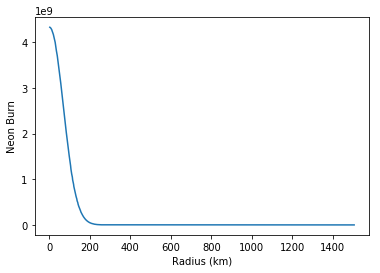

In [53]:
plt.plot(solarR*10**noPycnofinal.data('logR'),noPycnofinal.data('burn_ne'))
#plt.title("No Pycno Neon Burn")
plt.xlabel("Radius (km)")
plt.ylabel("Neon Burn")
plt.savefig(imagesDir+'/finalNoPycnoNeonBurn.eps')

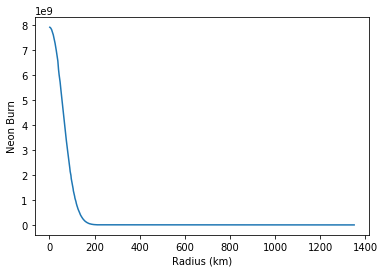

In [54]:
plt.plot(solarR*10**m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('burn_ne'))
#plt.title("M3Y bcc Relaxed Neon Burn")
plt.xlabel("Radius (km)")
plt.ylabel("Neon Burn")
plt.savefig(imagesDir+'/finalM3YbccRelaxedNeonBurn.eps')

Text(0,0.5,'Log Density')

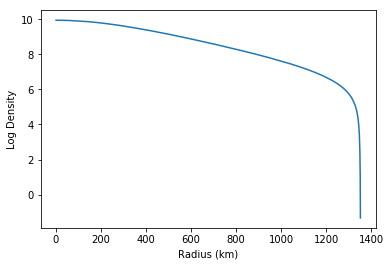

In [55]:
plt.plot(solarR*10**m3y_bcc_relaxedfinal.data('logR'),m3y_bcc_relaxedfinal.data('logRho'))
#plt.title("M3Y bcc Relaxed Neon Burn")
plt.xlabel("Radius (km)")
plt.ylabel("Log Density")
#plt.savefig(imagesDir+'/finalM3YbccRelaxedNeonBurn.eps')

In [56]:
print(noPycnofinal.power_nuc_burn/100000000)
print(m3y_bcc_relaxedfinal.power_nuc_burn)


1.4055251163598148
143214154.70679316


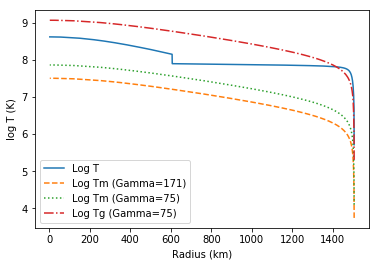

In [57]:
    thismodel = noPycnofinal
    rvalues = solarR*10.0**thismodel.data('logR')

    plt.plot(rvalues, thismodel.data('logT'),label="Log T",linestyle='solid')
    plt.plot(rvalues, np.log10(2000*(75/171)*(6**(5.0/3.0))*(10**thismodel.data('logRho'))**(1.0/3.0)),label="Log Tm (Gamma=171)",linestyle='dashed')
    plt.plot(rvalues, np.log10(2000*(75/75)*(6**(5.0/3.0))*(10**thismodel.data('logRho'))**(1.0/3.0)),label="Log Tm (Gamma=75)",linestyle='dotted')
    plt.plot(rvalues, np.log10(16.0*2000*(75/75)*(6**(5.0/3.0))*(10**thismodel.data('logRho'))**(1.0/3.0)),label="Log Tg (Gamma=75)",linestyle='dashdot')
    
    #plt.title("T and Tm vs Radius - No Pycno Rxns")
    plt.xlabel("Radius (km)")
    plt.ylabel("log T (K)")
    plt.legend()
    plt.savefig(imagesDir+'/TandMeltTnopycno.eps')

In [58]:
wd_cool5 = mr.MesaData('/media/sf_hellmersjl/mesa/star/test_suite/wd_cool/LOGS/profile5.data')
wd_cool6 = mr.MesaData('/media/sf_hellmersjl/mesa/star/test_suite/wd_cool/LOGS/profile6.data')
wd_cool7 = mr.MesaData('/media/sf_hellmersjl/mesa/star/test_suite/wd_cool/LOGS/profile7.data')

In [59]:
print(max(wd_cool5.data('gam')))
print(max(wd_cool6.data('gam')))
print(max(wd_cool7.data('gam')))
print(wd_cool6.star_age)
print(wd_cool7.star_age)

90.11763990175805
162.38820699023634
279.5192119246645
138503105.14149782
368628456.4799498


In [60]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='hellmersjl', api_key='yPZUv9YFg2dJ23KPg0aR')


In [61]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace1 = go.Scatter(
    name = "No Pycno",
    x = noPycnofinal.data('logR'),
    y = noPycnofinal.data('c12_c12')
)

trace2 = go.Scatter(
    name = "M3Y-bcc-Relaxed",
    x = m3y_bcc_relaxedfinal.data('logR'),
    y = m3y_bcc_relaxedfinal.data('c12_c12')
)

data = [trace1,trace2]

py.iplot(data, fileopt='overwrite',filename='basic-line', xTitle='Log Radius(km)',yTitle='C12 Energy (ergs/sec)')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hellmersjl/0 or inside your plot.ly account where it is named 'basic-line'


In [62]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace

trace1 = go.Scatter(
    x = g05final.data('logR'),
    y = g05final.data('logRho')
)

data = [trace1]

py.iplot(data, filename='basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hellmersjl/0 or inside your plot.ly account where it is named 'basic-line'


In [63]:
def genNucBurn(modelName):
    
    import mesa_reader as mr 
    import numpy as np
    
    profileFile = dataDir + '/' + modelName + '/LOGS/profiles.index'
    modelProfileIndex = mr.MesaProfileIndex(profileFile)
    burnArray = np.zeros(modelProfileIndex.index_data['profile_numbers'].size)
    for x in modelProfileIndex.index_data['profile_numbers']:
        profileFile = dataDir + '/' + modelName + '/LOGS/profile' + str(x) + '.data'
        model = mr.MesaData(profileFile)
        burnArray[x-1] = model.power_nuc_burn
    return burnArray

In [64]:
burn_m3y_bcc_static = genNucBurn('wd_ignite_m3y_bcc_static')
burn_m3y_bcc_relaxed = genNucBurn('wd_ignite_m3y_bcc_relaxed')
#burn_m3y_bcc_relaxed = burn_m3y_bcc_relaxed.resize(burn_m3y_bcc_static.size)
burn_m3y_bcc_relaxed.resize(3)


print(burn_m3y_bcc_static)
print(burn_m3y_bcc_relaxed)

[4.31485866e-23 1.68136455e-21 2.49202498e+00 1.25868528e+08]
[4.31485866e-23 1.68136455e-21 2.57555460e+00]


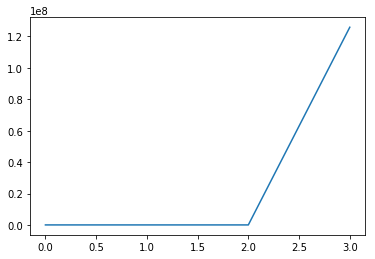

In [65]:
import matplotlib.pyplot as plt
plt.plot(burn_m3y_bcc_static)

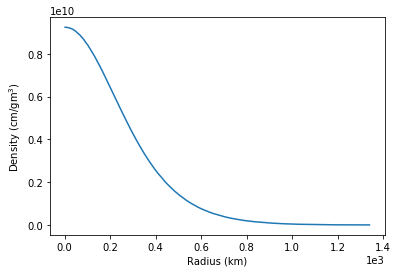

In [81]:
plt.plot(solarR*10**g05final.data('logR'),10**g05final.data('logRho'))
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("Density (cm/$\\rm gm^3$)")
plt.savefig(imagesDir + '/' + 'g05rhofinal.eps')
#print(10**finalCentralLogRho(g05final))

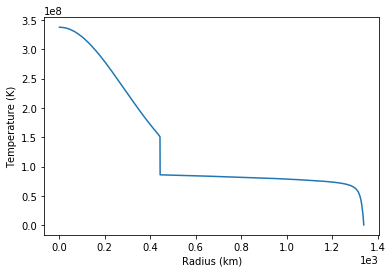

In [67]:
plt.plot(solarR*10**g05final.data('logR'),10**g05final.data('logT'))
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("Temperature (K)")
plt.savefig(imagesDir + '/' + 'g05tempfinal.eps')


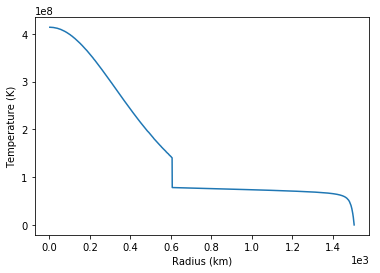

In [68]:
plt.plot(solarR*10**noPycnofinal.data('logR'),10**noPycnofinal.data('logT'))
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("Temperature (K)")
plt.savefig(imagesDir + '/' + 'nopycnotempfinal.eps')

In [69]:
density_cgs = 10.0**10.0
ndensity_cgs = (density_cgs/12.0)*6.022*10**23
r_m_avg = ((3.0/(4.0*np.pi*ndensity_cgs))**(1.0/3.0))/100.0
r_fm_avg = r_m_avg/(10**(-15))
print(density_cgs)
print(ndensity_cgs)
#print(r_avg/100.0)
print(r_fm_avg)

10000000000.0
5.018333333333334e+32
78.063969039072


In [70]:
density_cgs = 10.0**12.0
ndensity_cgs = (density_cgs/12.0)*6.022*10**23
r_m_avg = ((3.0/(4.0*np.pi*ndensity_cgs))**(1.0/3.0))/100.0
r_fm_avg = r_m_avg/(10**(-15))
print(density_cgs)
print(ndensity_cgs)
print(r_fm_avg)

1000000000000.0
5.018333333333332e+34
16.81837229393517


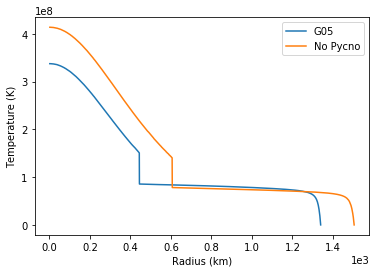

In [71]:
plt.plot(solarR*10**g05final.data('logR'),10**g05final.data('logT'),label="G05")
plt.plot(solarR*10**noPycnofinal.data('logR'),10**noPycnofinal.data('logT'),label="No Pycno")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("Temperature (K)")
plt.legend()
#plt.savefig(imagesDir + '/' + 'g05tempfinal.eps')

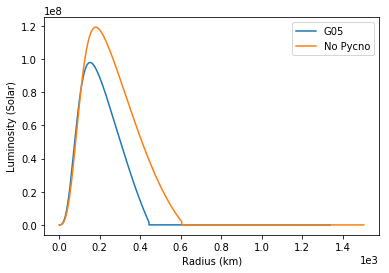

In [72]:
plt.plot(solarR*10**g05final.data('logR'),g05final.data('luminosity'),label="G05")
plt.plot(solarR*10**noPycnofinal.data('logR'),noPycnofinal.data('luminosity'),label="No Pycno")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("Luminosity (Solar)")
plt.legend()
#plt.savefig(imagesDir + '/' + 'g05tempfinal.eps')

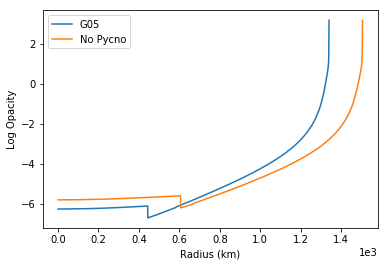

In [73]:
plt.plot(solarR*10**g05final.data('logR'),g05final.data('log_opacity'),label="G05")
plt.plot(solarR*10**noPycnofinal.data('logR'),noPycnofinal.data('log_opacity'),label="No Pycno")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("Log Opacity")
plt.legend()
#plt.savefig(imagesDir + '/' + 'g05tempfinal.eps')

/home/hellmersjl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log10

/home/hellmersjl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log10



Text(0,0.5,'eps nuc')

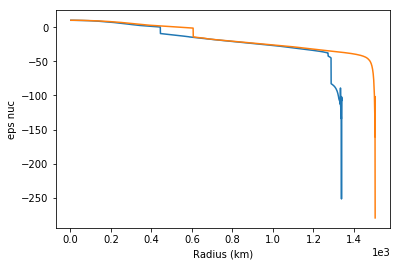

In [74]:
plt.plot(solarR*10**g05final.data('logR'),np.log10(g05final.data('eps_nuc')),label="G05")
plt.plot(solarR*10**noPycnofinal.data('logR'),np.log10(noPycnofinal.data('eps_nuc')),label="No Pycno")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("eps nuc")
#plt.savefig(imagesDir + '/' + 'g05tempfinal.eps')

Text(0,0.5,'Entropy')

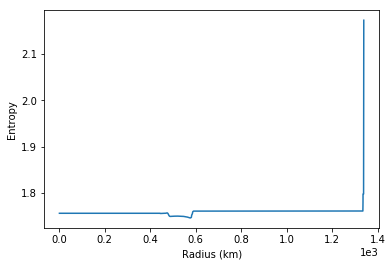

In [75]:
plt.plot(solarR*10**g05final.data('logR'),g05final.data('mu'))
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("Entropy")
#plt.savefig(imagesDir + '/' + 'g05tempfinal.eps')

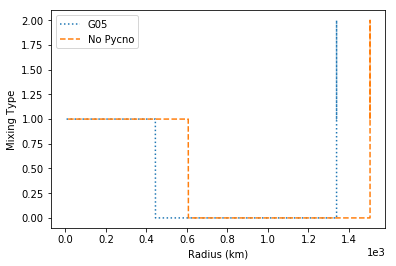

In [76]:
plt.plot(solarR*10**g05final.data('logR'),g05final.data('mlt_mixing_type'),label="G05",linestyle='dotted')
plt.plot(solarR*10**noPycnofinal.data('logR'),noPycnofinal.data('mlt_mixing_type'),label="No Pycno",linestyle='dashed')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("Mixing Type")
plt.legend()
plt.savefig(imagesDir + '/' + 'mixingTypefinal.eps')

/home/hellmersjl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log10

/home/hellmersjl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in log10



Text(0,0.5,'Eps Grav')

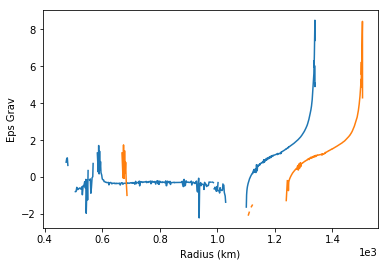

In [77]:
plt.plot(solarR*10**g05final.data('logR'),np.log10(g05final.data('eps_grav')),label="G05")
plt.plot(solarR*10**noPycnofinal.data('logR'),np.log10(noPycnofinal.data('eps_grav')),label="No Pycno")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Radius (km)")
plt.ylabel("Eps Grav")
#plt.savefig(imagesDir + '/' + 'g05tempfinal.eps')

In [78]:
print((solarR)*10**-2.7156223629541838)
print((solarR)*10**-2.7156247637161801)
print(1000*((solarR)*10**-2.7156223629541838-(solarR)*10**-2.7156247637161801))

1339.0587768034436
1339.051374562175
7.402241268664511


In [79]:
modelName = "wd_ignite_nopycno_ext"
profileIndexFile = dataDir + '/' + modelName + '/LOGS/profiles.index'
profileIndex = mr.MesaProfileIndex(profileIndexFile)
maxProfileIndex = profileIndex.index_data['profile_numbers'].size
print(maxProfileIndex)

modelAgeNoPycno = np.zeros(maxProfileIndex)
modelMassNoPycno = np.zeros(maxProfileIndex)
modelCMassNoPycno = np.zeros(maxProfileIndex)
modelNeonMassNoPycno = np.zeros(maxProfileIndex)
modelOMassNoPycno = np.zeros(maxProfileIndex)
modelNucBurnNoPycno = np.zeros(maxProfileIndex)
modelTeffNoPycno = np.zeros(maxProfileIndex)
modelRNoPycno = np.zeros(maxProfileIndex)

for i in range(0,maxProfileIndex):
    profileDataFile = dataDir + '/' + modelName + '/LOGS/profile' + str(i+1) + '.data'
    thisProfile = mr.MesaData(profileDataFile)
    modelAgeNoPycno[i] = thisProfile.header_data['star_age']
    modelMassNoPycno[i] = thisProfile.header_data['star_mass']
    modelCMassNoPycno[i] = thisProfile.header_data['star_mass_c12']
    modelNeonMassNoPycno[i] = thisProfile.header_data['star_mass_ne20']
    modelOMassNoPycno[i] = thisProfile.header_data['star_mass_o16']
    modelNucBurnNoPycno[i] = thisProfile.header_data['power_nuc_burn']
    modelTeffNoPycno[i] = thisProfile.header_data['Teff']
    modelRNoPycno[i] = thisProfile.header_data['photosphere_r']



173


In [80]:
modelName = "wd_ignite_g05_ext"
profileIndexFile = dataDir + '/' + modelName + '/LOGS/profiles.index'
profileIndex = mr.MesaProfileIndex(profileIndexFile)
maxProfileIndex = profileIndex.index_data['profile_numbers'].size
print(maxProfileIndex)

modelAgeG05 = np.zeros(maxProfileIndex)
modelMassG05 = np.zeros(maxProfileIndex)
modelCMassG05 = np.zeros(maxProfileIndex)
modelNeonMassG05 = np.zeros(maxProfileIndex)
modelOMassG05 = np.zeros(maxProfileIndex)
modelNucBurnG05 = np.zeros(maxProfileIndex)
modelTeffG05 = np.zeros(maxProfileIndex)
modelRG05 = np.zeros(maxProfileIndex)

for i in range(0,maxProfileIndex):
    profileDataFile = dataDir + '/' + modelName + '/LOGS/profile' + str(i+1) + '.data'
    thisProfile = mr.MesaData(profileDataFile)
    modelAgeG05[i] = thisProfile.header_data['star_age']
    modelMassG05[i] = thisProfile.header_data['star_mass']
    modelCMassG05[i] = thisProfile.header_data['star_mass_c12']
    modelOMassG05[i] = thisProfile.header_data['star_mass_o16']
    modelNeonMassG05[i] = thisProfile.header_data['star_mass_ne20']
    modelNucBurnG05[i] = thisProfile.header_data['power_nuc_burn']
    modelTeffG05[i] = thisProfile.header_data['Teff']
    modelRG05[i] = thisProfile.header_data['photosphere_r']


183


KeyboardInterrupt: 

In [ ]:
print(thisProfile.header_data)

In [ ]:
plt.plot(modelCMassNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelCMassG05,label="G05",linestyle='dashed')
plt.legend()
plt.xlabel("Model Number")
plt.ylabel("Mass of Carbon (Solar Masses)")
plt.savefig(imagesDir + '/' + 'evolveCMass.eps')

In [ ]:
plt.plot(modelAgeNoPycno, modelCMassNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelAgeG05,modelCMassG05,label="G05",linestyle='dashed')
plt.legend()
plt.xlabel("Time Accreting (years)")
plt.ylabel("Mass of Carbon (Solar Masses)")
plt.savefig(imagesDir + '/' + 'evolveCMassTime.eps')

In [ ]:
plt.plot(modelNeonMassNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelNeonMassG05,label="G05",linestyle='dashed')
plt.legend()
plt.xlabel("Model Number")
plt.ylabel("Mass of Neon (Solar Masses)")
plt.savefig(imagesDir + '/' + 'evolveNeonMass.eps')

In [ ]:
plt.plot(modelAgeNoPycno,modelNeonMassNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelAgeG05,modelNeonMassG05,label="G05",linestyle='dashed')
plt.legend()
plt.xlabel("Time Accreting (years)")
plt.ylabel("Mass of Neon (Solar Masses)")
plt.savefig(imagesDir + '/' + 'evolveNeonMassTime.eps')

In [ ]:
plt.plot(modelNucBurnNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelNucBurnG05,label="G05",linestyle='dashed')
plt.legend()
plt.xlabel("Model Number")
plt.ylabel("Nuclear Power (Solar Luminosity)")
plt.savefig(imagesDir + '/' + 'evolveNucPower.eps')

In [ ]:
plt.plot(modelAgeNoPycno, modelNucBurnNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelAgeG05, modelNucBurnG05,label="G05",linestyle='dashed')
plt.legend()
plt.xlabel("Time Accreting (years)")
plt.ylabel("Nuclear Power (Solar Luminosity)")
plt.savefig(imagesDir + '/' + 'evolveNucPowerTime.eps')

In [ ]:
plt.plot(modelMassNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelMassG05,label="G05",linestyle='dashed')
plt.legend()
plt.xlabel("Model Number")
plt.ylabel("Star Mass (Solar Masses)")
plt.savefig(imagesDir + '/' + 'evolveMass.eps')

In [ ]:
plt.plot(modelAgeNoPycno, modelMassNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelAgeG05, modelMassG05,label="G05",linestyle='dashed')
plt.legend()
plt.xlabel("Time Accreting (years)")
plt.ylabel("Star Mass (Solar Masses)")
plt.savefig(imagesDir + '/' + 'evolveMassTime.eps')

In [ ]:
plt.plot(modelTeffNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelTeffG05,label="G05",linestyle='dashed')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.legend()
plt.xlabel("Model Number")
plt.ylabel("Teff (K)")
plt.savefig(imagesDir + '/' + 'evolveTeff.eps')

In [ ]:
plt.plot(modelRNoPycno,label="No Pycno",linestyle='dotted')
plt.plot(modelRG05,label="G05",linestyle='dashed')
plt.legend()
plt.xlabel("Model Number")
plt.ylabel("R (Solar Radii)")
plt.savefig(imagesDir + '/' + 'evolveR.eps')

In [ ]:
np.log10(2.1631256530521325E-003)

In [ ]:
-2.6649182522473698